In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.model_selection import GridSearchCV
import graphviz 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, export_text
import graphviz  
from sklearn.tree import export_graphviz

import sklearn

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df = pd.read_csv("Datasets/KenPom Barttorvik.csv")
df['WINS'] = (df.ROUND==32) + 2*(df.ROUND==16)+ 3*(df.ROUND==8) + 4*(df.ROUND==4)+5*(df.ROUND==2)+6*(df.ROUND==1)
df['SEED2'] = df['SEED']**2
df

,YEAR,CONF,CONF ID,QUAD NO,QUAD ID,TEAM NO,TEAM ID,TEAM,SEED,ROUND,...,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK,WINS,SEED2
0,2024,MAC,17,61,1,1079,2,Akron,14,64,...,199,19,176,164,47,122,51,249,0,196
1,2024,SEC,28,63,3,1078,3,Alabama,4,4,...,8,156,106,10,314,2,263,7,4,16
2,2024,P12,24,63,3,1077,8,Arizona,2,16,...,37,196,7,195,134,8,14,47,2,4
3,2024,SEC,28,64,4,1076,12,Auburn,4,64,...,76,127,69,59,284,12,8,69,0,16
4,2024,B12,7,63,3,1075,14,Baylor,3,32,...,22,304,34,97,254,15,155,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,2008,BE,8,1,1,5,235,West Virginia,7,16,...,115,181,61,209,16,22,32,49,2,49
1075,2008,SB,26,1,1,4,236,Western Kentucky,12,16,...,179,55,131,127,214,27,28,203,2,144
1076,2008,BSth,10,4,4,3,239,Winthrop,13,64,...,206,89,236,339,190,170,12,179,0,169
1077,2008,B10,6,3,3,2,240,Wisconsin,3,16,...,35,98,12,118,117,60,2,57,2,9


In [3]:
df.shape

(1079, 105)

In [4]:
df_train = df[df['YEAR'] != 2024]
df_train = df_train[df_train['ROUND'] != 68]
df_test = df[df['YEAR'] == 2024]
df_test = df_test[df_test['ROUND'] != 68]


In [5]:
X_train = df_train.drop(['TEAM', 'CONF','CONF ID','QUAD NO', 'QUAD ID','TEAM NO','TEAM ID','ROUND','YEAR','ROUND', 'WINS'], axis=1)
y_train = df_train['WINS']
X_test = df_test.drop(['TEAM', 'CONF','CONF ID','QUAD NO', 'QUAD ID','TEAM NO','TEAM ID','ROUND','YEAR','ROUND', 'WINS'], axis=1)  
y_test = df_test['WINS']

In [6]:
X_train.columns

Index(['SEED', 'K TEMPO', 'K TEMPO RANK', 'KADJ T', 'KADJ T RANK', 'K OFF',
       'KO RANK', 'KADJ O', 'KADJ O RANK', 'K DEF', 'KD RANK', 'KADJ D',
       'KADJ D RANK', 'KADJ EM', 'KADJ EM RANK', 'BADJ EM', 'BADJ O', 'BADJ D',
       'BARTHAG', 'GAMES', 'W', 'L', 'WIN%', 'EFG%', 'EFG%D', 'FTR', 'FTRD',
       'TOV%', 'TOV%D', 'OREB%', 'DREB%', 'OP OREB%', 'OP DREB%', 'RAW T',
       '2PT%', '2PT%D', '3PT%', '3PT%D', 'BLK%', 'BLKED%', 'AST%', 'OP AST%',
       '2PTR', '3PTR', '2PTRD', '3PTRD', 'BADJ T', 'AVG HGT', 'EFF HGT', 'EXP',
       'TALENT', 'FT%', 'OP FT%', 'PPPO', 'PPPD', 'ELITE SOS', 'WAB',
       'BADJ EM RANK', 'BADJ O RANK', 'BADJ D RANK', 'BARTHAG RANK',
       'EFG% RANK', 'EFGD% RANK', 'FTR RANK', 'FTRD RANK', 'TOV% RANK',
       'TOV%D RANK', 'OREB% RANK', 'DREB% RANK', 'OP OREB% RANK',
       'OP DREB% RANK', 'RAW T RANK', '2PT% RANK', '2PT%D RANK', '3PT% RANK',
       '3PT%D RANK', 'BLK% RANK', 'BLKED% RANK', 'AST% RANK', 'OP AST% RANK',
       '2PTR RANK', '3PTR RA

In [7]:
# grid = {'max_depth':np.arange(1,10)}
# dtree = DecisionTreeRegressor()
# treeCV = GridSearchCV(dtree,param_grid=grid,return_train_score=True)
# treeCV.fit(X_train,y_train)
# print('best tree depth =',treeCV.best_params_, '  valid error rate =', (1 - treeCV.best_score_).round(3))

In [8]:
dtree = DecisionTreeRegressor(max_depth=2)
dtree.fit(X_train,y_train)
dtree.score(X_train,y_train)

0.3898106504707102

In [9]:
dtree.score(X_test,y_test)

0.4055481228118516

In [10]:
yh_test = dtree.predict(X_test)
predictions_df = pd.DataFrame({'TEAM':df_test['TEAM'],'Target':y_test, 'Predicted':yh_test})
predictions_df

,TEAM,Target,Predicted
0,Akron,0,0.154167
1,Alabama,4,0.748401
2,Arizona,2,1.942857
3,Auburn,0,1.942857
4,Baylor,1,1.942857
...,...,...,...
63,Wagner,0,0.154167
64,Washington St.,1,0.748401
65,Western Kentucky,0,0.154167
66,Wisconsin,0,0.748401


In [11]:
predictions_df['MSE'] = (predictions_df['Target']-predictions_df['Predicted'])**2
predictions_df.sort_values(by='MSE')

,TEAM,Target,Predicted,MSE
41,North Carolina,2,1.942857,0.003265
2,Arizona,2,1.942857,0.003265
32,Marquette,2,1.942857,0.003265
26,Iowa St.,2,1.942857,0.003265
0,Akron,0,0.154167,0.023767
...,...,...,...,...
16,Duke,3,0.748401,5.069699
7,Clemson,3,0.748401,5.069699
12,Connecticut,6,3.634146,5.597264
42,North Carolina St.,4,0.748401,10.572897


In [12]:
predictions_df.sort_values(by='Predicted',ascending=False)

,TEAM,Target,Predicted,MSE
46,Purdue,5,3.634146,1.865556
12,Connecticut,6,3.634146,5.597264
23,Houston,2,3.634146,2.670434
55,Tennessee,3,1.942857,1.117551
26,Iowa St.,2,1.942857,0.003265
...,...,...,...,...
30,Long Beach St.,0,0.154167,0.023767
21,Grambling St.,0,0.154167,0.023767
9,College of Charleston,0,0.154167,0.023767
8,Colgate,0,0.154167,0.023767


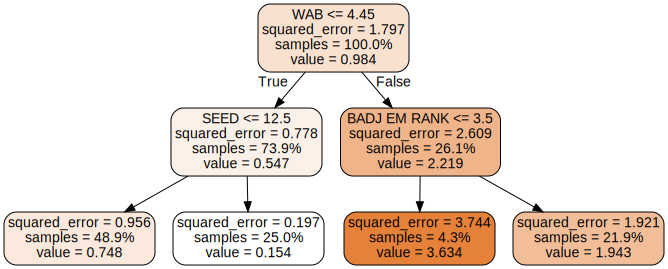

In [13]:
dot_data = export_graphviz(dtree,
                           out_file=None,
                           feature_names=X_train.columns,
                           proportion=True,
                           impurity=True,
                           filled=True,
                           rounded=True)
graph = graphviz.Source(dot_data)
graph

In [14]:
importances = pd.Series(dtree.feature_importances_,index = X_train.columns)
importances.sort_values(ascending=False)

WAB              0.770676
BADJ EM RANK     0.145942
SEED             0.083381
EFG% RANK        0.000000
OP OREB% RANK    0.000000
                   ...   
OREB%            0.000000
TOV%D            0.000000
TOV%             0.000000
FTRD             0.000000
SEED2            0.000000
Length: 95, dtype: float64

In [15]:
# grid = {'max_depth':[1,2,3,4,5,6,7,8,10,15,20],'n_estimators':[100,200,500,1000,1500,2000]}
# rfr = RandomForestRegressor()
# rfrCV = GridSearchCV(rfr,param_grid=grid,n_jobs=-1)
# rfrCV.fit(X_train,y_train)
# print('Random Forest Regressor:')
# print(' Optimal Parameters:',rfrCV.best_params_)
# print(' Optimal Valid R2 =',rfrCV.best_score_)

In [16]:
rfr = RandomForestRegressor(max_depth=2, n_estimators=100)
rfr.fit(X_train,y_train)
print(rfr.score(X_train, y_train))
rfr.score(X_test, y_test)

0.4272879835925204


0.4098173772548782

In [17]:
yh_test = rfr.predict(X_test)
predictions_df = pd.DataFrame({'TEAM':df_test['TEAM'],'Target':y_test, 'Predicted':yh_test})
predictions_df

,TEAM,Target,Predicted
0,Akron,0,0.229039
1,Alabama,4,1.031656
2,Arizona,2,2.319933
3,Auburn,0,2.611570
4,Baylor,1,1.730427
...,...,...,...
63,Wagner,0,0.229039
64,Washington St.,1,0.726420
65,Western Kentucky,0,0.264729
66,Wisconsin,0,0.872207


In [18]:
predictions_df['MSE'] = (predictions_df['Target']-predictions_df['Predicted'])**2
predictions_df.sort_values(by='MSE')

,TEAM,Target,Predicted,MSE
28,Kansas,1,1.040632,0.001651
41,North Carolina,2,1.927805,0.005212
32,Marquette,2,1.908019,0.008460
34,Michigan St.,1,0.820528,0.032210
56,Texas,1,0.810326,0.035976
...,...,...,...,...
7,Clemson,3,0.783508,4.912835
12,Connecticut,6,3.547785,6.013358
3,Auburn,0,2.611570,6.820299
1,Alabama,4,1.031656,8.811067


In [19]:
predictions_df.sort_values(by='Predicted',ascending=False)

,TEAM,Target,Predicted,MSE
23,Houston,2,3.568741,2.460949
12,Connecticut,6,3.547785,6.013358
46,Purdue,5,3.351144,2.718727
3,Auburn,0,2.611570,6.820299
26,Iowa St.,2,2.427890,0.183090
...,...,...,...,...
30,Long Beach St.,0,0.229039,0.052459
61,Vermont,0,0.229039,0.052459
63,Wagner,0,0.229039,0.052459
8,Colgate,0,0.229039,0.052459


In [20]:
importances = pd.Series(rfr.feature_importances_,index = X_train.columns)
importances.sort_values(ascending=False)

WAB        0.473613
BARTHAG    0.108099
BADJ EM    0.082174
SEED2      0.063934
KADJ EM    0.063312
             ...   
3PT%D      0.000000
3PT%       0.000000
2PT%D      0.000000
2PT%       0.000000
AVG HGT    0.000000
Length: 95, dtype: float64

In [21]:
# grid = {'learning_rate':[0.001,0.05,0.01,0.1,1],'n_estimators':[100,200,500,1000,1500,2000],'max_depth':[1,2,3,4,5,6,7,8,10,15,20]}
# gbt = GradientBoostingRegressor()
# gbtCV = GridSearchCV(gbt,param_grid=grid,n_jobs=-1)
# gbtCV.fit(X_train, y_train)
# print('Gradient Boosting Trees:')
# print(' Optimal Parameters:',gbtCV.best_params_)
# print(' Optimal Valid R2 =',gbtCV.best_score_)

In [22]:
gbt = GradientBoostingRegressor(max_depth=1, n_estimators=200, learning_rate=0.05)
gbt.fit(X_train,y_train)
print(gbt.score(X_train, y_train))
gbt.score(X_test, y_test)

0.48503739951447966


0.4303620182035576

In [23]:
yh_test = gbt.predict(X_test)
predictions_df = pd.DataFrame({'TEAM':df_test['TEAM'],'Target':y_test, 'Predicted':yh_test})
predictions_df

,TEAM,Target,Predicted
0,Akron,0,0.307851
1,Alabama,4,1.106027
2,Arizona,2,2.343109
3,Auburn,0,2.236267
4,Baylor,1,1.145658
...,...,...,...
63,Wagner,0,0.166536
64,Washington St.,1,0.845601
65,Western Kentucky,0,0.307828
66,Wisconsin,0,0.754722


In [24]:
predictions_df['MSE'] = (predictions_df['Target']-predictions_df['Predicted'])**2
predictions_df.sort_values(by='MSE')

,TEAM,Target,Predicted,MSE
56,Texas,1,0.890472,0.011996
34,Michigan St.,1,1.116189,0.013500
41,North Carolina,2,2.118200,0.013971
4,Baylor,1,1.145658,0.021216
64,Washington St.,1,0.845601,0.023839
...,...,...,...,...
7,Clemson,3,0.824411,4.733188
3,Auburn,0,2.236267,5.000892
12,Connecticut,6,3.367191,6.931683
1,Alabama,4,1.106027,8.375079


In [25]:
predictions_df.sort_values(by='Predicted',ascending=False)

,TEAM,Target,Predicted,MSE
23,Houston,2,3.390966,1.934785
12,Connecticut,6,3.367191,6.931683
46,Purdue,5,3.055646,3.780511
26,Iowa St.,2,2.545462,0.297529
2,Arizona,2,2.343109,0.117724
...,...,...,...,...
48,Saint Peter's,0,0.194302,0.037753
31,Longwood,0,0.178933,0.032017
21,Grambling St.,0,0.178933,0.032017
30,Long Beach St.,0,0.170459,0.029056


In [26]:
importances = pd.Series(gbt.feature_importances_,index = X_train.columns)
importances.sort_values(ascending=False)

WAB             0.315355
BARTHAG         0.165759
BADJ EM         0.090528
BADJ EM RANK    0.071241
SEED            0.069877
                  ...   
PPPO            0.000000
PPPD            0.000000
KADJ T RANK     0.000000
BARTHAG RANK    0.000000
AVG HGT         0.000000
Length: 95, dtype: float64

In [27]:
df['YEAR'].value_counts()

YEAR
2024    68
2023    68
2022    68
2021    68
2019    68
2018    68
2017    68
2016    68
2015    68
2014    68
2013    68
2012    68
2011    68
2010    65
2009    65
2008    65
Name: count, dtype: int64